In [1]:
#Dal problema della contrattazione di Nash
# pag. 42 Giochi Non cooperativi, ed. Zanichelli
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1. Contrattazione con baratto, SENZA denaro
Bill_goods_ini = ['Libro', 'Frusta', 'Palla', 'Mazza', 'Scatola']
Jack_goods_ini = ['Penna', 'Giocattolo', 'Coltellino', 'Berretto']

all_goods = Bill_goods_ini + Jack_goods_ini

#Utilita' del singolo bene per Bill
u = {}
u['Bill'] = {}
u['Bill']['Libro'] = 2
u['Bill']['Frusta'] = 2
u['Bill']['Palla'] = 2
u['Bill']['Mazza'] = 2
u['Bill']['Scatola'] = 4
u['Bill']['Penna'] = 10
u['Bill']['Giocattolo'] = 4
u['Bill']['Coltellino'] = 6
u['Bill']['Berretto'] = 2

#Utilita' del singolo bene per Jack
u['Jack'] = {}
u['Jack']['Libro'] = 4
u['Jack']['Frusta'] = 2
u['Jack']['Palla'] = 1
u['Jack']['Mazza'] = 2
u['Jack']['Scatola'] = 1
u['Jack']['Penna'] = 1
u['Jack']['Giocattolo'] = 1
u['Jack']['Coltellino'] = 2
u['Jack']['Berretto'] = 2

#La funzione utilita' totale (U) per il singolo giocatore (Bill/Jack) e' definita come
#la somma delle utilita' singole (u) dei beni posseduti da Bill/Jack 
#l'utilità è definita a meno di un offset b e di un fattore moltiplicativo a
#U_bill = a*(sum_i u_Bill(i)) + b (1)

# L'offset b puo' essere fissato dicendo che,se la contrazione non avviene,
# le parti rimangono con i beni iniziali: 
# ergo io voglio che U(beni iniziali, giocatore) = 0

b = {}
b['Bill']=0
for i in Bill_goods_ini:
  b['Bill']-=u['Bill'][i]

b['Jack'] = 0
for i in Jack_goods_ini:
 b['Jack']-=u['Jack'][i]

# Percio'
# U_Bill = sum_i u_bill(i) +b[Bill]
# U_Jack = sum_i u_jack(i) +b[Jack]
# In modo che U_Bill(ini) = U_Jack(ini) = 0

def compute_U(goods_list, person):
  # Dati i beni posseduti e il valore che la persona
  # attribuisce loro, calcola la Utilita' totale dei beni 
  # scalata in modo che sia zero per non contrattazione
  U=0
  for i in goods_list:
    U+=u[person][i]
  U+=b[person]
  return U

##Check Calibration
print(compute_U(Bill_goods_ini,'Bill')) #-->0
print(compute_U(Jack_goods_ini,'Jack')) #-->0

0
0


In [ ]:
#2. Definire tutti i possibili esiti della contrattazione

# Io ho tutti i beni a disposizione: quelli di Bill e di Jack assieme
# Devo ripartirli in tutti i modi possibili tra i due giocatori.
# Percio', semplicemente, prendo tutti i beni e listo tutte le combinazioni di 1,2, ... N elementi 
# Le assegno al "giocatore1"; il "giocatore2" prende il resto

from itertools import combinations 

outcome_1 = [] #tutti i possibili outcome per il giocatore 1 (generico)
for i in range(len(all_goods)+1):
  outcome_1+=list(combinations(all_goods, i))

outcome_2 = []
for out_1 in outcome_1:
  out_2 = list(set(all_goods) - set(out_1))
  #[el for el in all_goods if el not in out_1]
  #outcome_2.append(tuple(out_2))
  outcome_2.append(out_2)
  assert len(out_1)+len(out_2) == len(all_goods)

assert len(outcome_1) == len(outcome_2)
print("Ci sono: "+str(len(outcome_1)*2)+" esiti possibili per la contrattazione.")
# Perché quel *2? Ma perché il giocatore1 puo' essere Bill o Jack e il giocatore2 di conseguenza.

****
Max value for u_bill * u_jac :* 60
The max is found when utilities are:  (12, 5)
The configurations of goods for Bill/Jack resulting in the above utility are:
[(('Scatola', 'Penna', 'Giocattolo', 'Coltellino'), ('Frusta', 'Libro', 'Mazza', 'Berretto', 'Palla'))]
Bill ha dato a Jack:  {'Frusta', 'Palla', 'Libro', 'Mazza'}
Jack ha dato a Bill:  {'Penna', 'Giocattolo', 'Coltellino'}


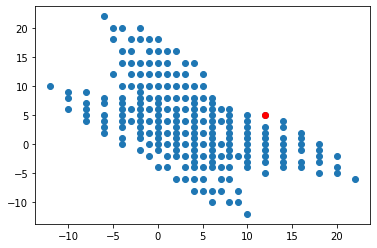

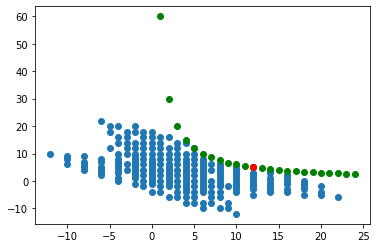

In [54]:
from collections import defaultdict
#3. Calcolare le funzioni di utilita' totale (U) associate a ogni possibile outcome
U_inverse_map=defaultdict(list)
for i in range(len(outcome_1)):
    ## eccolo qua il fattore 2 in evidenza
    #U_map[(tuple(outcome_1[i]),tuple(outcome_2[i]))] = (compute_U(outcome_1[i],'Bill'),compute_U(outcome_2[i],'Jack'))
    #U_map[(tuple(outcome_2[i]),tuple(outcome_1[i]))] = (compute_U(outcome_1[i],'Jack'),compute_U(outcome_2[i],'Bill'))
    U_inverse_map[(compute_U(outcome_1[i],'Bill'),compute_U(outcome_2[i],'Jack'))].append( (tuple(outcome_1[i]),tuple(outcome_2[i])) ) 
    U_inverse_map[(compute_U(outcome_1[i],'Jack'),compute_U(outcome_2[i],'Bill'))].append( (tuple(outcome_2[i]),tuple(outcome_1[i])) )

phase_space = []
#phase_space contiene tutte le possibili coppie U_bill, U_jack
for key in U_inverse_map:
    phase_space.append(key)

#print(phase_space)

u_bill=[]
u_jack=[]
for el in phase_space:
    u_bill.append(el[0])
    u_jack.append(el[1])
plt.scatter(u_jack, u_bill)

#4. Find maximum
max=0
coord = (None,None)
for u_bill_, u_jack_ in phase_space:
    if (u_bill_*u_jack_)> max:
        max=u_bill_*u_jack_
        coord = (u_bill_,u_jack_)
print("****")
print("Max value for u_bill * u_jac :*",max)
print("The max is found when utilities are: ",coord)
plt.scatter(coord[0],coord[1], color="r")
print("The configurations of goods for Bill/Jack resulting in the above utility are:")
print(U_inverse_map[coord])
# La soluzione è unica nello spazio delle utilità, non nello spazio dei beni

for goods_outcomes in U_inverse_map[coord]:
    #print(goods_outcomes[0], goods_outcomes[1])
    print("Bill ha dato a Jack: ",set(goods_outcomes[1]) - set(Jack_goods_ini))
    print("Jack ha dato a Bill: ",set(goods_outcomes[0]) - set(Bill_goods_ini))

    
plt.figure()
plt.scatter(u_jack, u_bill)
## create parabolas
x=[]
y=[]
for i in range(1,25):
    x.append(i)
    y.append(60./i)
plt.scatter(x,y, color='green')
plt.scatter(coord[0],coord[1], color="r")


    
    
